# Ran Yan math&statistics assessment

In [ ]:
! pip install scipy


In [ ]:
! pip install matplotlib

In [ ]:
! pip install statsmodels

In [ ]:
! pip install seaborn


In [2]:
# Import packages
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import binom
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Set matplotlib as inline
%matplotlib inline 

## Case 
A cooking website sells cooking equipment. They want to improve their product page. The product page has a rail with media (images or videos). Up until now, they have had a horizontal rail, a UX designer suggested having a vertical one. As the data analyst in the company, I suggested doing an AB test on it. The results of the experiment is in the file named assessment_da25.csv.

In [3]:
file_path = 'assessment_da25.csv'
df = pd.read_csv(file_path)
df.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB


#### checking the distributions of the columns between variants

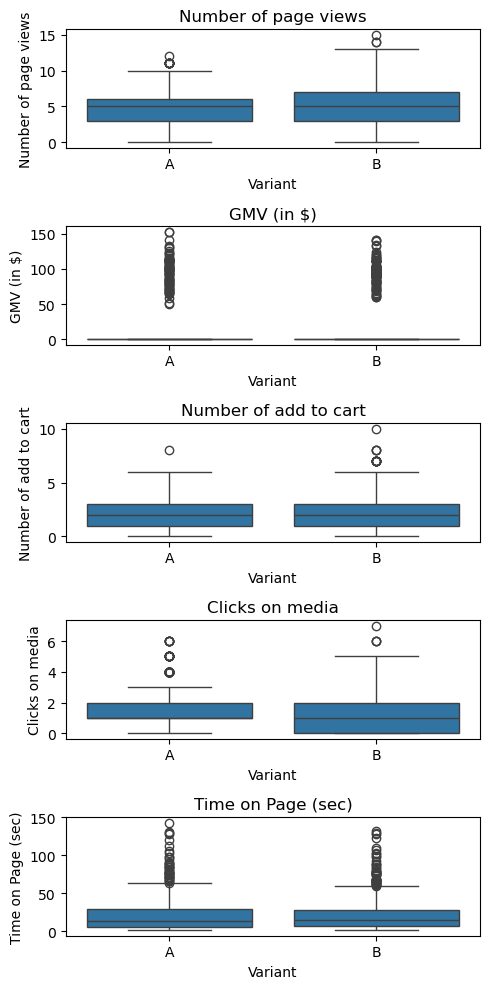

In [8]:
metrics = ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']


fig, axes = plt.subplots(len(metrics), 1, figsize=(5, 10))

for i, metric in enumerate(metrics):
    sns.boxplot(ax=axes[i], x='Variant', y=metric, data=df)
    axes[i].set_title(metric)

plt.tight_layout()
plt.show()

### 1. Primary Metric 
The conversion rate of " add to cart" will be taken as the primary metric here. In order to caculate it, a new column called 'cart_status' is added , define by whether user add the product to cart or not depending on the column 'number of add to cart'

In [9]:
df['cart_status']= df['Number of add to cart'].apply(lambda x: 1 if x > 0 else 0)
conversion_rate_add_to_cart_A=df[df['Variant']=='A']['cart_status'].mean()
conversion_rate_add_to_cart_B=df[df['Variant']=='B']['cart_status'].mean()

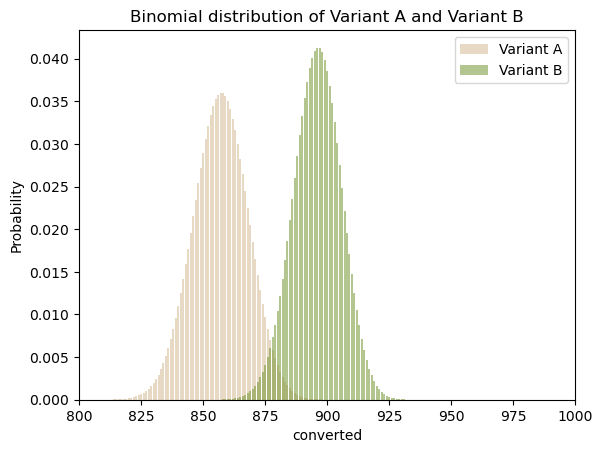


    The conversion rate of "add to cart" is 0.86 in Variant A and 0.90 in Varian B. Is that difference statistically significant?
    


In [10]:
#plot the binomial distribution of the two variants
# Set parameters for the binomial distribution
n_A = len(df[df['Variant']=='A'])  
p_A = conversion_rate_add_to_cart_A # probability of success of variant A 
n_B = len(df[df['Variant']=='B']) 
p_B = conversion_rate_add_to_cart_B # probability of success of variant B 

# Generate x values (number of successes)
x_A_values = np.arange(0, n_A+1)
x_B_values = np.arange(0, n_B+1)
# Calculate the PMF using scipy.stats.binom.pmf
pmf_A_values = binom.pmf(x_A_values, n_A, p_A)
pmf_B_values = binom.pmf(x_A_values, n_A, p_B)

# Plot the PMF
plt.bar(x_A_values, pmf_A_values, label='Variant A', alpha=0.5, color='tan')
plt.bar(x_B_values, pmf_B_values, label='Variant B', alpha=0.5, color='olivedrab')

# Add labels and title
plt.xlabel('converted')
plt.ylabel('Probability')
plt.title(f'Binomial distribution of Variant A and Variant B')

plt.xlim(800,1000)
plt.legend()
# Show the plot
plt.show()
print(
    """
    The conversion rate of "add to cart" is {:.2f} in Variant A and {:.2f} in Varian B. Is that difference statistically significant?
    """.format( 
        conversion_rate_add_to_cart_A, 
        conversion_rate_add_to_cart_B
    )
)

Text(0, 0.5, 'PDF')

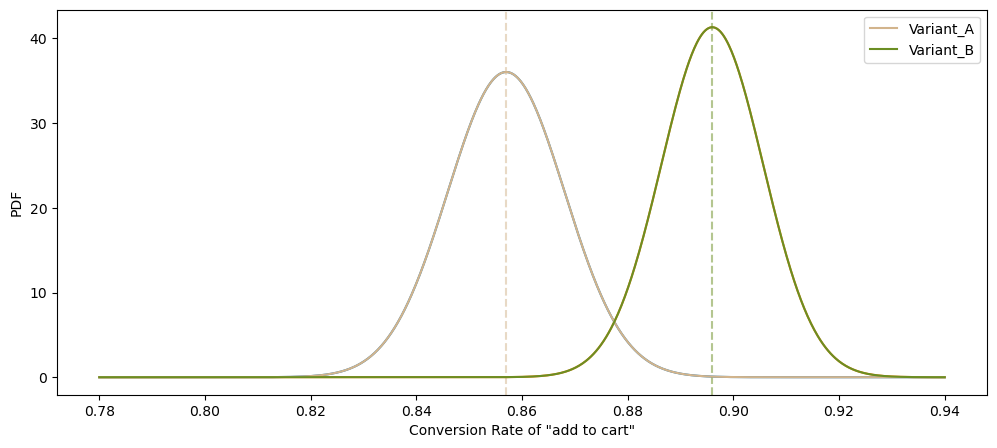

In [11]:
# standard error of the mean for both groups
SE_A = np.sqrt(p_A * (1-p_A)) / np.sqrt(n_A)
SE_B = np.sqrt(p_B * (1-p_B)) / np.sqrt(n_B)
# plot the null and alternative hypothesis
fig, ax = plt.subplots(figsize=(12,5))
x = np.linspace(.78, .94, 1000)
yA = stats.norm(p_A, SE_A).pdf(x)
ax.plot(x, yA)
ax.axvline(x=p_A, c='tan', alpha=0.5, linestyle='--')
yB = stats.norm(p_B, SE_B).pdf(x)
ax.plot(x, yB)
ax.axvline(x=p_B, c='olivedrab', alpha=0.5, linestyle='--')
plt.plot(x, yA, label = 'Variant_A', c = 'tan')
plt.plot(x, yB, label = 'Variant_B', c = 'olivedrab')
plt.legend()
plt.xlabel('Conversion Rate of "add to cart"')
plt.ylabel('PDF')

### Test of primary metrics 
#### two_simples independent test

Run z test on the conversion rate of " add to cart" with the parameter of the propotion of users put product into cart in Variant A and Variant B

In [14]:
z_stat, p_value = sm.stats.proportions_ztest([df[df['Variant']=='A']['cart_status'].sum(),df[df['Variant']=='B']['cart_status'].sum()],
                                             [1000, 1000])
if p_value >0.05:
   print("P_Value:",p_value, "Z_statistics:",z_stat,'fail to reject the null hypothesis')
else:
   print("P_Value:",p_value, "Z_statistics:",z_stat,'reject the null hypothesis')

P_Value: 0.008035477874459714 Z_statistics: -2.6505754440584934 reject the null hypothesis


### 2. Secondary Metrics 
#### 2.1 the average clicks on media

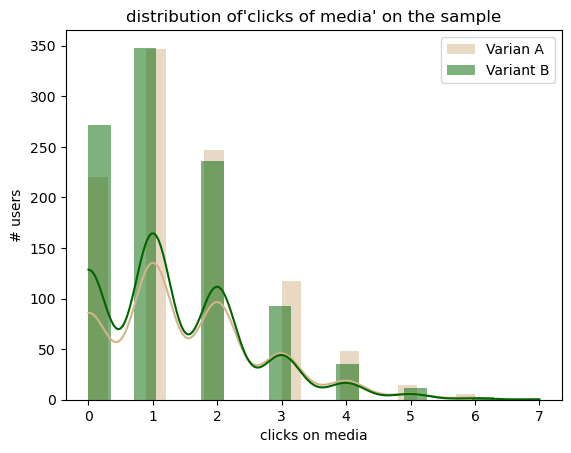


    The average Clicks on media is 1.50 in Variant A and 1.32 in Varian B. Is that difference statistically significant?
    


In [16]:
#sns plot
ax=sns.histplot(data=df, x=df[df['Variant']=='A']['Clicks on media'], bins=20, color='tan', label='Varian A', alpha=0.5,edgecolor='none',kde=True)
sns.histplot(data=df, x=df[df['Variant']=='B']['Clicks on media'], bins=20, color='darkgreen', label='Variant B', alpha=0.5,edgecolor='none',kde=True)

# Set labels and title
plt.xlabel('clicks on media')
plt.ylabel('# users')
plt.title("distribution of'clicks of media' on the sample")

# Show the legend
plt.legend()

# Show the plot
plt.show()

print(
    """
    The average Clicks on media is {:.2f} in Variant A and {:.2f} in Varian B. Is that difference statistically significant?
    """.format( 
        df[df['Variant']=='A']['Clicks on media'].mean(), 
        df[df['Variant']=='B']['Clicks on media'].mean()
    )
)

### Test of clicks on media
Run t test on the means of the 'clicks on media' of the two variants

In [21]:

t_stat, p_value =stats.ttest_ind( df[df['Variant']=='A']['Clicks on media'], df[df['Variant']=='B']['Clicks on media'], equal_var=False)
if p_value >0.05:
   print("P_Value:",p_value, "T_statistics:",t_stat,'fail to reject the null hypothesis')
else:
   print("P_Value:",p_value, "T_statistics:",t_stat,'reject the null hypothesis')

P_Value: 0.001541857715988478 T_statistics: 3.1710702328903153 reject the null hypothesis


### 2.2 conversion rate of 'clicks on media'

add a new column "click", define by whether user click on the media at all after entering the product page

In [18]:
df['click']= df['Clicks on media'].apply(lambda x: 1 if x > 0 else 0)
conversion_rate_click_on_media_A=df[df['Variant']=='A']['click'].mean()
conversion_rate_click_on_media_B=df[df['Variant']=='B']['click'].mean()

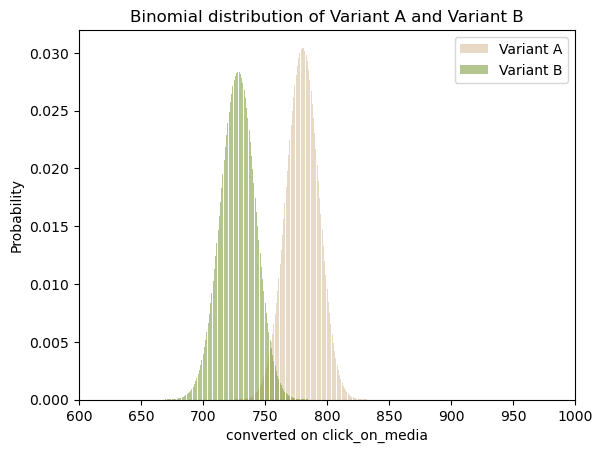


    The conversion rate of "click on media" is 0.78 in Variant A and 0.73 in Varian B. Is that difference statistically significant?
    


In [19]:
#plot
# Set parameters for the binomial distribution
n_A = len(df[df['Variant']=='A'])  # number of trials of variant A
p_A = conversion_rate_click_on_media_A # probability of success of variant A 
n_B = len(df[df['Variant']=='B'])  # number of trials of variant B
p_B = conversion_rate_click_on_media_B # probability of success of variant B 

# Generate x values (number of successes)
x_A_values = np.arange(0, n_A+1)
x_B_values = np.arange(0, n_B+1)
# Calculate the PMF using scipy.stats.binom.pmf
pmf_A_values = binom.pmf(x_A_values, n_A, p_A)
pmf_B_values = binom.pmf(x_A_values, n_A, p_B)

# Plot the PMF
plt.bar(x_A_values, pmf_A_values, label='Variant A', alpha=0.5, color='tan')
plt.bar(x_B_values, pmf_B_values, label='Variant B', alpha=0.5, color='olivedrab')

# Add labels and title
plt.xlabel('converted on click_on_media')
plt.ylabel('Probability')
plt.title(f'Binomial distribution of Variant A and Variant B')

plt.xlim(600,1000)
plt.legend()
# Show the plot
plt.show()
print(
    """
    The conversion rate of "click on media" is {:.2f} in Variant A and {:.2f} in Varian B. Is that difference statistically significant?
    """.format( 
        conversion_rate_click_on_media_A, 
       conversion_rate_click_on_media_B
    )
)

#### test of conversion rate of "click on media"

In [20]:
z_stat, p_value = sm.stats.proportions_ztest([df[df['Variant']=='A']['click'].sum(),df[df['Variant']=='B']['click'].sum()],
                                             [1000, 1000])
if p_value >0.05:
   print("P_Value:",p_value, "Z_statistics:",z_stat,'fail to reject the null hypothesis')
else:
   print("P_Value:",p_value, "Z_statistics:",z_stat,'reject the null hypothesis')

P_Value: 0.0069376599880696865 Z_statistics: 2.6998219214654635 reject the null hypothesis


### 2.3 Average number of page view

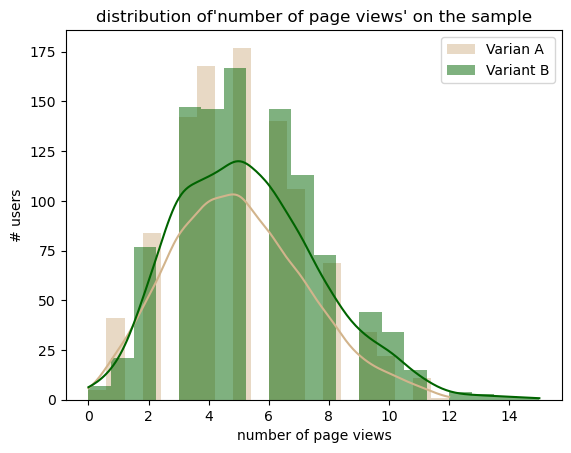


    The average number of page views is 4.99 in Variant A and 5.32 in Varian B. Is that difference statistically significant?
    


In [17]:
#sns plot
ax=sns.histplot(data=df, x=df[df['Variant']=='A']['Number of page views'], bins=20, color='tan', label='Varian A', alpha=0.5,edgecolor='none',kde=True)
sns.histplot(data=df, x=df[df['Variant']=='B']['Number of page views'], bins=20, color='darkgreen', label='Variant B', alpha=0.5,edgecolor='none',kde=True)

# Set labels and title
plt.xlabel('number of page views')
plt.ylabel('# users')
plt.title("distribution of'number of page views' on the sample")

# Show the legend
plt.legend()

# Show the plot
plt.show()

print(
    """
    The average number of page views is {:.2f} in Variant A and {:.2f} in Varian B. Is that difference statistically significant?
    """.format( 
        df[df['Variant']=='A']['Number of page views'].mean(), 
        df[df['Variant']=='B']['Number of page views'].mean()
    )
)

#### Test
Run t test on the means of the 'Number of page views' of the two variants

In [22]:
t_stat, p_value=stats.ttest_ind( df[df['Variant']=='A']['Number of page views'], df[df['Variant']=='B']['Number of page views'], equal_var=False)
if p_value >0.05:
   print("P_Value:",p_value, "T_statistics:",t_stat,'fail to reject the null hypothesis')
else:
   print("P_Value:",p_value, "T_statistics:",t_stat,'reject the null hypothesis')

P_Value: 0.001454076157215842 T_statistics: -3.1881645133877003 reject the null hypothesis


### 2.4 Conversion rate
add a new column "convertion", define by whether user purchase anything, which is when GMV>0.

In [24]:
df['conversion']= df['GMV (in $)'].apply(lambda x: 1 if x > 0 else 0)
conversion_rate_A=df[df['Variant']=='A']['conversion'].mean()
conversion_rate_B=df[df['Variant']=='B']['conversion'].mean()

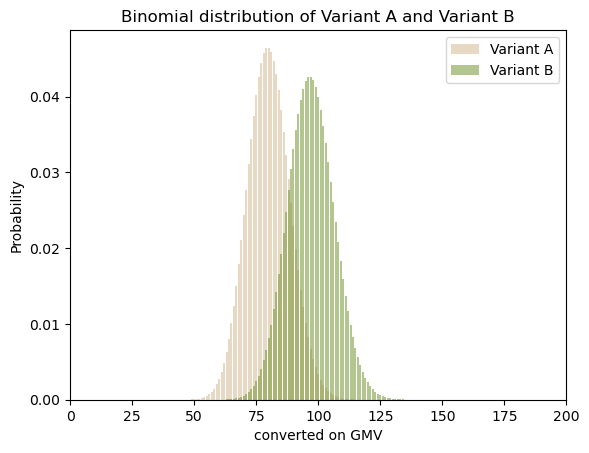


    The conversion rate of GMV is 0.08 in Variant A and 0.10 in Varian B. Is that difference statistically significant?
    


In [25]:
#plot
# Set parameters for the binomial distribution
n_A = len(df[df['Variant']=='A'])  # number of trials of variant A
p_A = conversion_rate_A # probability of success of variant A 
n_B = len(df[df['Variant']=='B'])  # number of trials of variant B
p_B = conversion_rate_B # probability of success of variant B 

# Generate x values (number of successes)
x_A_values = np.arange(0, n_A+1)
x_B_values = np.arange(0, n_B+1)
# Calculate the PMF using scipy.stats.binom.pmf
pmf_A_values = binom.pmf(x_A_values, n_A, p_A)
pmf_B_values = binom.pmf(x_A_values, n_A, p_B)

# Plot the PMF
plt.bar(x_A_values, pmf_A_values, label='Variant A', alpha=0.5, color='tan')
plt.bar(x_B_values, pmf_B_values, label='Variant B', alpha=0.5, color='olivedrab')

# Add labels and title
plt.xlabel('converted on GMV')
plt.ylabel('Probability')
plt.title(f'Binomial distribution of Variant A and Variant B')

plt.xlim(0,200)
plt.legend()
# Show the plot
plt.show()
print(
    """
    The conversion rate of GMV is {:.2f} in Variant A and {:.2f} in Varian B. Is that difference statistically significant?
    """.format( 
        conversion_rate_A, 
       conversion_rate_B
    )
)

#### test on conversion rate

In [26]:
z_stat, p_value = sm.stats.proportions_ztest([df[df['Variant']=='A']['conversion'].sum(),df[df['Variant']=='B']['conversion'].sum()],
                                             [1000, 1000])
if p_value >0.05:
   print("P_Value:",p_value, "Z_statistics:",z_stat,'fail to reject the null hypothesis')
else:
   print("P_Value:",p_value, "Z_statistics:",z_stat,'reject the null hypothesis')

P_Value: 0.18076806320424155 Z_statistics: -1.3383939096387558 fail to reject the null hypothesis


In [ ]:
stats.ttest_ind( df[df['Variant']=='A']['convertion'], df[df['Variant']=='B']['convertion'], equal_var=False)

### 3. Guardrail metric 
revenue per user

In [27]:
df.groupby('Variant')['GMV (in $)'].sum()

Variant
A    7689.99
B    9289.53
Name: GMV (in $), dtype: float64

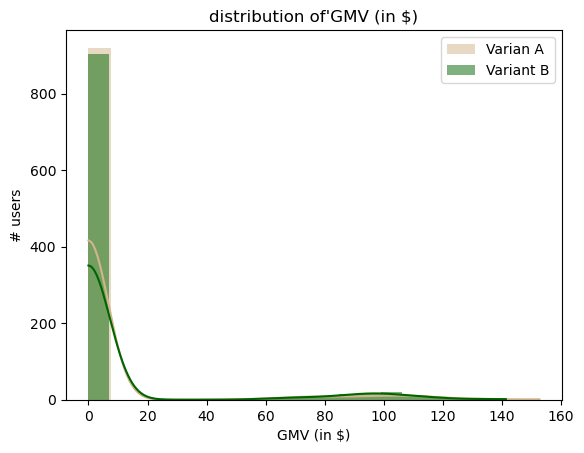


    The average GMV (in $) is 7.69 in Variant A and 9.29 in Varian B. Is that difference statistically significant?
    


In [28]:
#sns plot
ax=sns.histplot(data=df, x=df[df['Variant']=='A']['GMV (in $)'], bins=20, color='tan', label='Varian A', alpha=0.5,edgecolor='none',kde=True)
sns.histplot(data=df, x=df[df['Variant']=='B']['GMV (in $)'], bins=20, color='darkgreen', label='Variant B', alpha=0.5,edgecolor='none',kde=True)

# Set labels and title
plt.xlabel('GMV (in $)')
plt.ylabel('# users')
plt.title("distribution of'GMV (in $)")

# Show the legend
plt.legend()

# Show the plot
plt.show()

print(
    """
    The average GMV (in $) is {:.2f} in Variant A and {:.2f} in Varian B. Is that difference statistically significant?
    """.format( 
        df[df['Variant']=='A']['GMV (in $)'].mean(), 
        df[df['Variant']=='B']['GMV (in $)'].mean()
        )
)

#### test of GMV per user

In [29]:
t_stat, p_value=stats.ttest_ind( df[df['Variant']=='A']['GMV (in $)'], df[df['Variant']=='B']['GMV (in $)'], equal_var=False)
if p_value >0.05:
   print("P_Value:",p_value, "T_statistics:",t_stat,'fail to reject the null hypothesis')
else:
   print("P_Value:",p_value, "T_statistics:",t_stat,'reject the null hypothesis')

P_Value: 0.19930776178517312 T_statistics: -1.2839539769831623 fail to reject the null hypothesis
